# Gain Margin and Phase Margin

## Preparations

In [17]:
from IPython.core.display import HTML
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 10,
})

from sympy import *
from sympy.plotting import plot
import mpmath as mp

from mathprint import *

Define variables that we are going to use repetitively.
We also need to define specific prpoperties of the variables.

In [18]:
from sympy.abc import s, epsilon, k

t        = symbols('t'       , real=True)
omega    = symbols('omega'   , positive=True)
zeta     = symbols('zeta'    , real=True)
omega_n  = symbols('omega_n' , positive=True)

## Example 1

Let us take an example that can be found in this [MATLAB help page](https://www.mathworks.com/help/control/ug/assessing-gain-and-phase-margins.html). 

![](./images/p11.png)

Given the system $G(s)$. We are going to apply a constant gain feedback control to $G(s)$.

In [19]:
G = (0.5*s + 1.3) / (s**3 + 1.2*s**2 + 1.6*s)
mprint("G(s)=", latex(G))

<IPython.core.display.Math object>

In [20]:
Gjw = G.subs(s, I*omega)
mprint("G(j \\omega)=", latex(Gjw))

<IPython.core.display.Math object>

### The magnitude equation:

In [21]:
M = Abs(Gjw)
mprint("M=", latex(M))

Mdb = 20*log(M,10)
mprint("M_{dB} = ", latex(Mdb))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### The phase equation:

In [22]:
Phi = simplify(atan(im(Gjw)/re(Gjw)))
mprint("\\phi = ", latex(Phi))

<IPython.core.display.Math object>

### Cross-over frequencies

### Bode plot

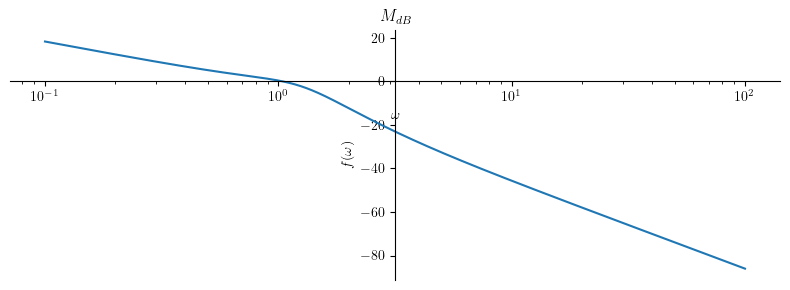

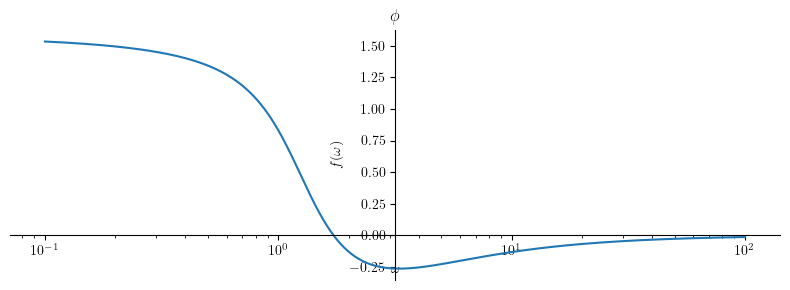

In [23]:
mag = plot(Mdb, (omega, 0.1 , 100), size=(8, 3), show=False, title='$ M_{dB} $', xscale='log')
mag.show()

pha = plot(Phi, (omega, 0.1 , 100), size=(8, 3), title='$ \\phi $', show=False,  xscale='log')
pha.show()

### Gain cross-over frequency

Find $\omega$ where the magnitude is zero dB. __Take the positive value__.

In [24]:
w_gain = list(solveset(Eq(Mdb, 0), omega, domain=S.Reals))
mprint("\\omega_{gain}=", latex(w_gain))

<IPython.core.display.Math object>

### Phase cross-over frequency

Find $\omega$ where the phase is $n\pi$, where $n$ is integer numbers (negative, zero, and positive). From the plot, we know we must check 0. __Take the positive value__.

In [25]:
w_phase = list(solveset(Eq(Phi, 0), omega, domain=S.Reals))
mprint("\\omega_{phase}=", latex(w_phase))

<IPython.core.display.Math object>

### Gain margin

$M_{dB}$ when $\omega = \omega_{phase}$

In [26]:
GM = abs(Mdb.subs(omega, w_phase[1]).evalf())
GM

8.76406377378585

### Phase margin

$\phi$ when $\omega = \omega_{gain}$

In [27]:
PM = abs(mp.degrees(Phi.subs(omega, w_gain[1]).evalf())) # in  degrees
PM

44.6515693146620

### Comparison with the Routh method

Let us take a look at the gain margin. Since it is in dB, let us bring it back to a plain gain.

In [28]:
mprintb(latex(10**(GM/20)))

<IPython.core.display.Math object>

Now, let us apply the Routh method for the __closed-loop__ system. Hence, first we must compute the closed-loop transfer function. 

In [29]:
Gcl = simplify(k*G/(1+k*G))
Gcl

k*(0.5*s + 1.3)/(k*(0.5*s + 1.3) + s**3 + 1.2*s**2 + 1.6*s)

Now, we can apply the Routh method.

In [30]:
from rh import *

table = make_routh_table(Gcl)
print_table(table)


<IPython.core.display.Math object>

Our concern is at row #3 and column #1. This part can not be zero or negative. Knowing this, we can then compute the maximum value for $k$.

In [31]:
table[2,0]

1.6 - 0.583333333333333*k

In [32]:
reduce_inequalities(table[2,0] > 0, k)

(-oo < k) & (k < 2.74285714285714)

$$ \boxed{\text{The value is exacly identical with the gain margin that we have previously computed!}} $$